# <center>Brain Area Clustering Based on Gene Expression<center>

## <div style="text-align: right;">----5510 Final Project</div>

## 1. Project Topic

The brain is a complex organ that can be divided into several distinct areas, each with its own unique properties, such as gene expression patterns. Clustering these brain areas based on gene expressions is a valuable approach to evaluating the effectiveness of various clustering algorithms. **This project will utilize hierarchical clustering and k-means clustering to group the brain areas according to their gene expression patterns**, allowing for a comparison of their respective performances.

## 2. Data

### Introductory Paper

De Rosa, Maria Caterina et al. “Gene expression atlas of energy balance brain regions.” JCI insight vol. 6,16 e149137. 23 Aug. 2021, doi:10.1172/jci.insight.149137

### Data Source
Gene Expression Omnibus(GEO)-Series GSE178290

### Link
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE178290

### General Information

This data involved bulk-RNAseq data of mouse brain regions involved in energy balance. Overall design is 70 samples across 22 brain regions and two stem cell lines.

### 2.1. Load Packages
We begin by loading the necessary packages for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

### 2.2. Data Fetching
Next, we import the dataset.

In [2]:
# Load the dataset
file_path = '/Users/xinpeiyue/Downloads/GSE178290_DoegeLab_BrainPunch_TPMData_GeneLevel.csv'
df = pd.read_csv(file_path)

gene_names = df.iloc[:, 1]

In [3]:
df

,Unnamed: 0,Gene,_ACA1,_ACA2,_ACA3,_ACB1,_ACB2,_ACB3,_ARH1,_ARH2,...,NTS_2,NTS_3,NTS_4,PVH_1,PVH_2,VMH_1,VMH_2,VTA_1,VTA_2,VTA_3
0,1,0610009B22Rik,33.079400,30.657370,35.268971,30.487630,33.255520,35.472000,42.607100,41.232070,...,42.434490,39.680910,40.784600,36.359860,44.784120,37.758160,50.214150,14.596070,44.927500,31.192360
1,2,0610009O20Rik,22.533300,20.236800,20.396800,24.200200,21.364000,23.137700,25.428400,23.445600,...,27.865300,25.264300,24.231500,24.721400,23.807000,23.198200,25.987700,10.217900,27.024100,19.122800
2,3,0610010F05Rik,36.405481,29.173142,29.055645,25.238646,23.154112,25.741044,32.603270,29.865880,...,23.764804,26.418492,24.189011,28.995200,27.569500,32.025371,30.735043,20.753053,25.426441,28.426636
3,4,0610010K14Rik,41.817153,45.589726,40.798180,48.603016,62.071375,50.472258,50.154286,41.108642,...,46.819780,46.316426,37.152061,66.008359,52.014347,50.049700,51.574760,10.779332,51.011821,42.162166
4,5,0610012G03Rik,34.914200,41.051300,33.973100,32.414400,31.194600,32.911000,23.253900,30.766300,...,33.129500,29.491900,21.523200,28.391200,32.910200,25.223600,30.011600,13.027500,40.446500,20.264700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34672,34673,Zyg11a,0.000000,0.000000,0.051721,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.048224,0.048839,0.000000,0.000000,0.000000,0.000000,0.108615,0.000000,0.000000,0.000000
34673,34674,Zyg11b,66.143122,63.494024,65.208800,50.617400,43.888472,52.313890,54.727700,46.192000,...,51.270100,49.146800,52.891600,56.151500,58.367800,56.156109,56.573510,25.148600,45.394300,42.025200
34674,34675,Zyx,43.750714,45.323156,39.229530,18.441987,20.450860,16.161843,20.418457,22.243909,...,65.116970,64.635360,52.493722,46.475870,54.499400,20.359473,21.983326,38.108692,57.986045,59.198142
34675,34676,Zzef1,21.384527,21.255209,20.085743,26.221069,23.353736,21.428655,24.866927,20.139926,...,16.886667,18.763233,17.035410,21.105901,22.062576,22.945175,23.337945,8.423101,17.883205,12.611376


I noticed that the first column is unnecessary, so I decided to delete it.

In [4]:
# Remove unnecessary column
df = df.drop(df.columns[0], axis=1)
df

,Gene,_ACA1,_ACA2,_ACA3,_ACB1,_ACB2,_ACB3,_ARH1,_ARH2,_ARH3,...,NTS_2,NTS_3,NTS_4,PVH_1,PVH_2,VMH_1,VMH_2,VTA_1,VTA_2,VTA_3
0,0610009B22Rik,33.079400,30.657370,35.268971,30.487630,33.255520,35.472000,42.607100,41.232070,47.175300,...,42.434490,39.680910,40.784600,36.359860,44.784120,37.758160,50.214150,14.596070,44.927500,31.192360
1,0610009O20Rik,22.533300,20.236800,20.396800,24.200200,21.364000,23.137700,25.428400,23.445600,23.927300,...,27.865300,25.264300,24.231500,24.721400,23.807000,23.198200,25.987700,10.217900,27.024100,19.122800
2,0610010F05Rik,36.405481,29.173142,29.055645,25.238646,23.154112,25.741044,32.603270,29.865880,31.185463,...,23.764804,26.418492,24.189011,28.995200,27.569500,32.025371,30.735043,20.753053,25.426441,28.426636
3,0610010K14Rik,41.817153,45.589726,40.798180,48.603016,62.071375,50.472258,50.154286,41.108642,53.119191,...,46.819780,46.316426,37.152061,66.008359,52.014347,50.049700,51.574760,10.779332,51.011821,42.162166
4,0610012G03Rik,34.914200,41.051300,33.973100,32.414400,31.194600,32.911000,23.253900,30.766300,36.374400,...,33.129500,29.491900,21.523200,28.391200,32.910200,25.223600,30.011600,13.027500,40.446500,20.264700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34672,Zyg11a,0.000000,0.000000,0.051721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.048224,0.048839,0.000000,0.000000,0.000000,0.000000,0.108615,0.000000,0.000000,0.000000
34673,Zyg11b,66.143122,63.494024,65.208800,50.617400,43.888472,52.313890,54.727700,46.192000,59.327987,...,51.270100,49.146800,52.891600,56.151500,58.367800,56.156109,56.573510,25.148600,45.394300,42.025200
34674,Zyx,43.750714,45.323156,39.229530,18.441987,20.450860,16.161843,20.418457,22.243909,23.185445,...,65.116970,64.635360,52.493722,46.475870,54.499400,20.359473,21.983326,38.108692,57.986045,59.198142
34675,Zzef1,21.384527,21.255209,20.085743,26.221069,23.353736,21.428655,24.866927,20.139926,22.483237,...,16.886667,18.763233,17.035410,21.105901,22.062576,22.945175,23.337945,8.423101,17.883205,12.611376


In [5]:
# Check missing values
total_na_values = df.isna().sum().sum()
print("Total number of NA values:", total_na_values)

Total number of NA values: 0


No missing values in the dataset. Great!

In [6]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34677 entries, 0 to 34676
Data columns (total 71 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gene         34677 non-null  object 
 1   _ACA1        34677 non-null  float64
 2   _ACA2        34677 non-null  float64
 3   _ACA3        34677 non-null  float64
 4   _ACB1        34677 non-null  float64
 5   _ACB2        34677 non-null  float64
 6   _ACB3        34677 non-null  float64
 7   _ARH1        34677 non-null  float64
 8   _ARH2        34677 non-null  float64
 9   _ARH3        34677 non-null  float64
 10  _CBN1        34677 non-null  float64
 11  _CBN2        34677 non-null  float64
 12  _CBN3        34677 non-null  float64
 13  _CENT21      34677 non-null  float64
 14  _CENT22      34677 non-null  float64
 15  _CENT23      34677 non-null  float64
 16  _CENT24      34677 non-null  float64
 17  _CUL4,51     34677 non-null  float64
 18  _CUL4,52     34677 non-null  float64
 19  _CUL

### Summary of the data
**Dimension:** The data consists of 71 columns and 34,677 rows. The first column contains the gene names, while the remaining columns represent different brain areas. Each row corresponds to a specific gene and its expression levels across various brain regions.

**Data Type:** The first column is of type object, while the remaining columns are of type float64.

**Data Size:** The dataset is approximately 18.8+ MB in size.


## 3. Exploratory Data Analysis

Let's first take a look at the distribution of gene expression for specific brain regions.

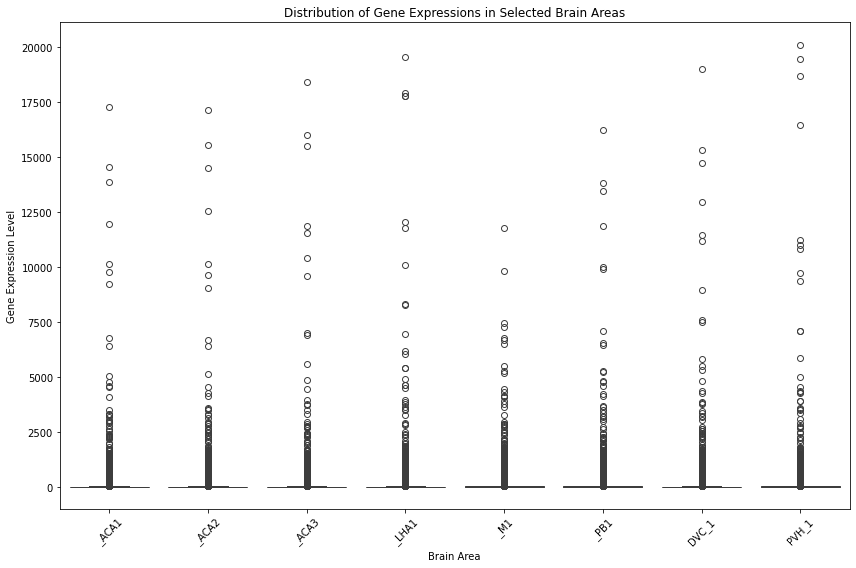

In [9]:
# Select the columns for the brain areas
selected_areas = ['_ACA1', '_ACA2', '_ACA3', '_LHA1', '_M1', '_PB1', 'DVC_1', 'PVH_1']
df_selected = df[selected_areas]

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected)
plt.xlabel('Brain Area')
plt.ylabel('Gene Expression Level')
plt.title('Distribution of Gene Expressions in Selected Brain Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot, several observations can be made:

**Expression Levels:** Most genes exhibit low expression levels across the various brain areas, while only a few genes show very high expression levels.

**Similarity in Gene Expression:** Samples originating from the same brain areas, such as ACA1, ACA2, and ACA3, demonstrate similar gene expression patterns, indicating a degree of similarity in gene expression within these areas.

**Distinct Gene Expression Patterns:** Different brain areas, like M1 and PVH1, appear to possess distinct gene expression patterns, suggesting unique genetic signatures associated with each brain region.

To further investigate the differences in gene expression patterns between different brain areas, I conducted a scatter plot analysis. The scatter plot compares the correlation between samples from the same brain area (ACA1 vs. ACA2) and samples from different brain areas (ACA1 vs. VTA1). This analysis aims to determine if the gene expression patterns within the same brain area are more similar compared to gene expression patterns between different brain areas.

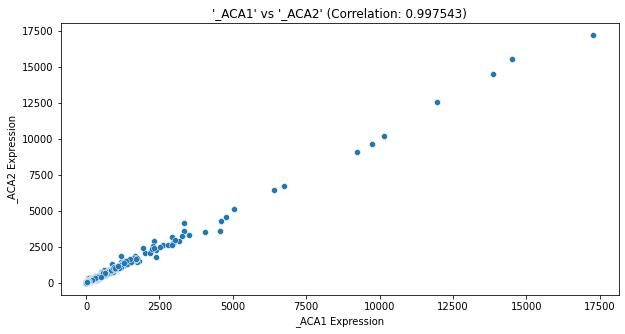

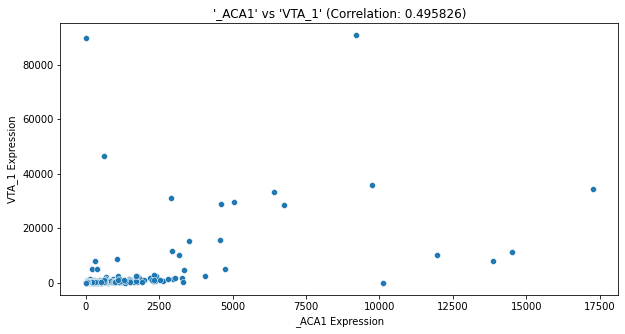

In [8]:
# Plot '_ACA1' vs '_ACA2'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='_ACA1', y='_ACA2', data=df)
plt.title(f"'_ACA1' vs '_ACA2' (Correlation: {df['_ACA1'].corr(df['_ACA2']):.6f})")
plt.xlabel('_ACA1 Expression')
plt.ylabel('_ACA2 Expression')
plt.show()

# Plot '_ACA1' vs 'VTA_1'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='_ACA1', y='VTA_1', data=df)
plt.title(f"'_ACA1' vs 'VTA_1' (Correlation: {df['_ACA1'].corr(df['VTA_1']):.6f})")
plt.xlabel('_ACA1 Expression')
plt.ylabel('VTA_1 Expression')
plt.show()

From the two plots above, the following observations can be made:

**ACA1 vs ACA2:** These samples exhibit a high correlation, with a correlation coefficient of >0.99. This high correlation suggests that the gene expression patterns between these two samples are strongly correlated, which is consistent with the expectation since they originate from the same brain region.

**ACA1 vs VTA1:** In contrast, these samples show no significant correlation, with a correlation coefficient of 0.496. This lack of correlation indicates that the gene expression patterns between these two samples are not related and exhibit considerable differences, which aligns with the fact that they come from different brain regions.

Next, I will analyze the distribution of gene expressions for specific genes across different brain areas.

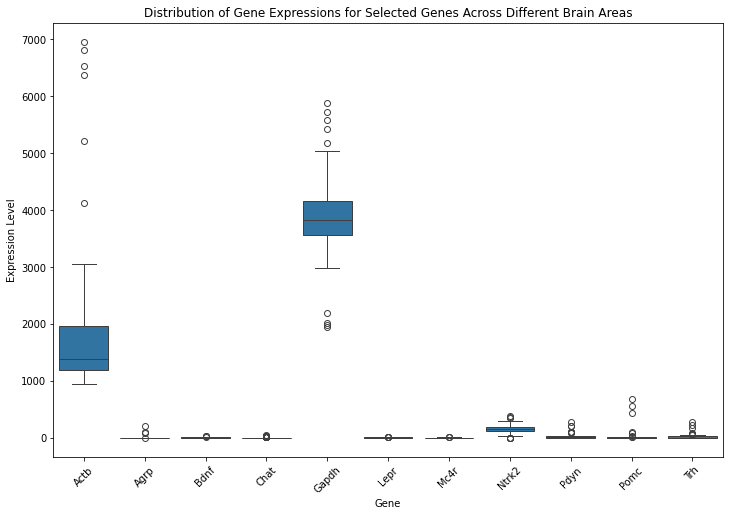

In [10]:
# Select the rows corresponding to the selected genes
selected_genes = ['Actb', 'Gapdh', 'Pomc', 'Ntrk2', 'Agrp', 'Pdyn', 'Trh', 'Chat', 'Lepr', 'Bdnf', 'Mc4r']
df_selected = df[df['Gene'].isin(selected_genes)]

# Melt the dataframe for plotting
df_melted = pd.melt(df_selected, id_vars=['Gene'], var_name='BrainArea', value_name='ExpressionLevel')

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gene', y='ExpressionLevel', data=df_melted)
plt.xticks(rotation=45)
plt.title('Distribution of Gene Expressions for Selected Genes Across Different Brain Areas')
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.show()

I have selected several genes to assess their expression levels across different brain areas, categorizing them into three groups:

**Genes with High Expression:** These genes, such as 'Actb' and 'Gapdh', exhibit high expression levels across all brain areas and regions. This suggests the need for data normalization to address these high expression levels, which could potentially skew the analysis.

**Genes with Low Expression:** 'Chat', 'Lepr', 'Bdnf', and 'Mc4r' display low expression levels across all brain regions. While these genes may not be as influential in clustering analysis, they could still provide valuable insights into gene expression patterns within the brain.

**Genes with Differential Expression:** Genes like 'Pomc', 'Ntrk2', 'Agrp', 'Pdyn', and 'Trh' show varying expression levels across different brain regions. These genes are likely to be important features for clustering analysis, as they reflect the distinct gene expression patterns in different brain areas.

## 4. Data Preprocessing

To preprocess the data for clustering analysis, I plan to:

1. Transpose the data to have brain areas as rows and genes as columns, as clustering is based on brain areas.

2. Scale the data due to extremely high-expression genes and the high dimensionality of the data.

In [11]:
# Drop the first column (gene name) for subsequent transpose
df = df.drop(df.columns[0], axis=1)

# Transpose the data
df_transposed = df.transpose()

#Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_transposed), columns=gene_names, index=df_transposed.index)

# Display the first few rows of the normalized data
df_normalized

Gene,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040J01Rik,1110002E22Rik,1110004E09Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
_ACA1,0.518931,0.394709,0.366862,0.242993,0.596000,0.243763,0.436383,0.189373,1.000000,0.521268,...,0.032484,0.648185,0.666225,0.379659,0.485889,0.000000,1.000000,0.406501,0.613681,0.315854
_ACA2,0.450931,0.321106,0.272852,0.272529,0.746001,0.233159,0.326682,0.267467,0.886575,0.680297,...,0.011046,0.683324,0.572939,0.445607,0.738857,0.000000,0.952271,0.422554,0.608342,0.300270
_ACA3,0.580405,0.326234,0.271325,0.235016,0.572998,0.322173,0.464878,0.224840,0.953003,0.572993,...,0.030261,0.647367,0.524906,0.475099,0.518791,0.002352,0.983166,0.360344,0.560064,0.300650
_ACB1,0.446166,0.448133,0.221709,0.296119,0.534901,0.502179,0.375233,0.200306,0.182794,0.401873,...,0.022914,0.475508,0.699117,0.614492,0.843662,0.000000,0.720270,0.148127,0.813345,0.411970
_ACB2,0.523876,0.357233,0.194613,0.401562,0.505088,0.396273,0.589206,0.125802,0.048557,0.628705,...,0.015049,0.448273,0.735662,0.475568,0.818305,0.000000,0.599034,0.168635,0.694975,0.392437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMH_1,0.650290,0.416019,0.309927,0.307445,0.359147,0.351440,0.421265,0.048067,0.017652,0.600968,...,0.014578,0.999835,0.730339,0.535937,0.853759,0.000000,0.820062,0.167702,0.678108,0.311572
VMH_2,1.000000,0.505423,0.293155,0.319385,0.476173,0.316348,0.435528,0.074610,0.025769,0.751686,...,0.027292,0.984361,0.679321,0.616733,0.735943,0.004940,0.827582,0.184280,0.694323,0.316780
VTA_1,0.000000,0.000000,0.163403,0.000000,0.061055,0.000000,0.000000,0.058085,0.061525,0.000000,...,0.007552,0.421592,0.000000,0.163643,0.000000,0.000000,0.261394,0.348902,0.078601,0.000000
VTA_2,0.851574,0.538640,0.224150,0.314978,0.731218,0.186931,0.624659,0.162525,0.006502,0.455847,...,0.012564,0.783472,0.569813,0.298147,0.383171,0.000000,0.626165,0.551828,0.469137,0.156806


## 5. Models

### 5.1 Hierarchical Clustering
I will first employ hierarchical clustering to group the brain regions. Given the significance of the linkage method in hierarchical clustering, I will experiment with various linkage methods and compare their respective results.

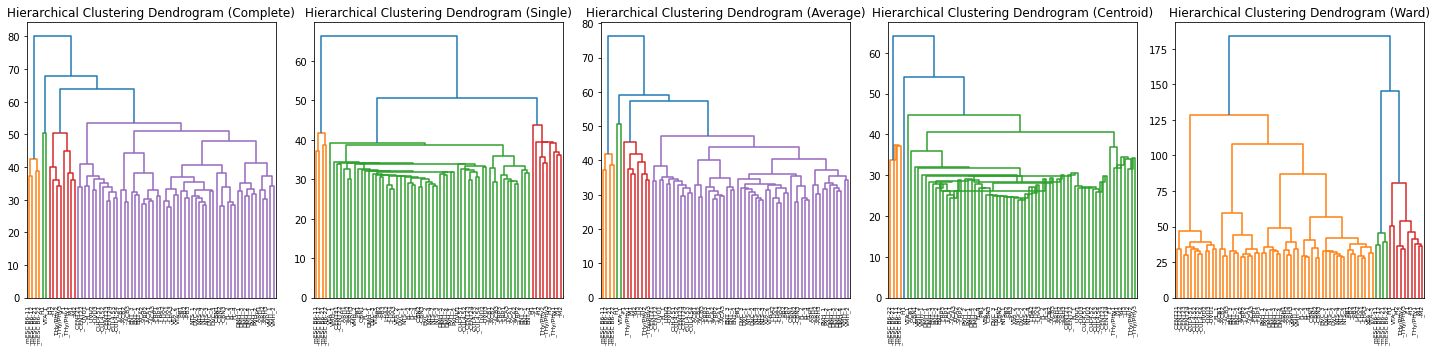

In [12]:
# Define the linkage methods
linkage_methods = ['complete', 'single', 'average', 'centroid', 'ward']

# Create subplots for each linkage method
fig, axs = plt.subplots(1, len(linkage_methods), figsize=(20, 5))

# Perform hierarchical clustering and plot dendrograms for each method
for i, method in enumerate(linkage_methods):
    linked = linkage(df_normalized, method=method)
    axs[i].set_title(f'Hierarchical Clustering Dendrogram ({method.capitalize()})')
    dendrogram(linked, labels=df_normalized.index, leaf_rotation=90, ax=axs[i])

plt.tight_layout()
plt.show()

From the dendrograms above, the following observations can be made:

1. The 'ward' linkage method appears to yield the best performance.
2. With the 'ward' linkage method, choosing a threshold of approximately 75 results in the clear clustering of the data into 7 distinct groups.

Now I will check the silhouette score to determine the best n_cluster. The silhouette score is a metric used to evaluate the quality of clusters created by a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

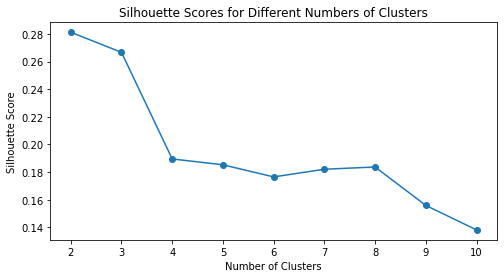

In [13]:
# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In general, the silhouette score can decrease as the number of clusters increases. This can happen if the clusters become more fragmented or if the clusters are not well-separated, leading to lower silhouette scores. 
From the graph above, it is evident that the silhouette score remains stable when the number of clusters is varied between 4 and 8. Therefore, based on this metric, an optimal choice for the number of clusters would be 8. However, the silhouette score alone is not enough to determine the optimal number of clusters. So I will do PCA and plot the clustering for different n_clusters values.

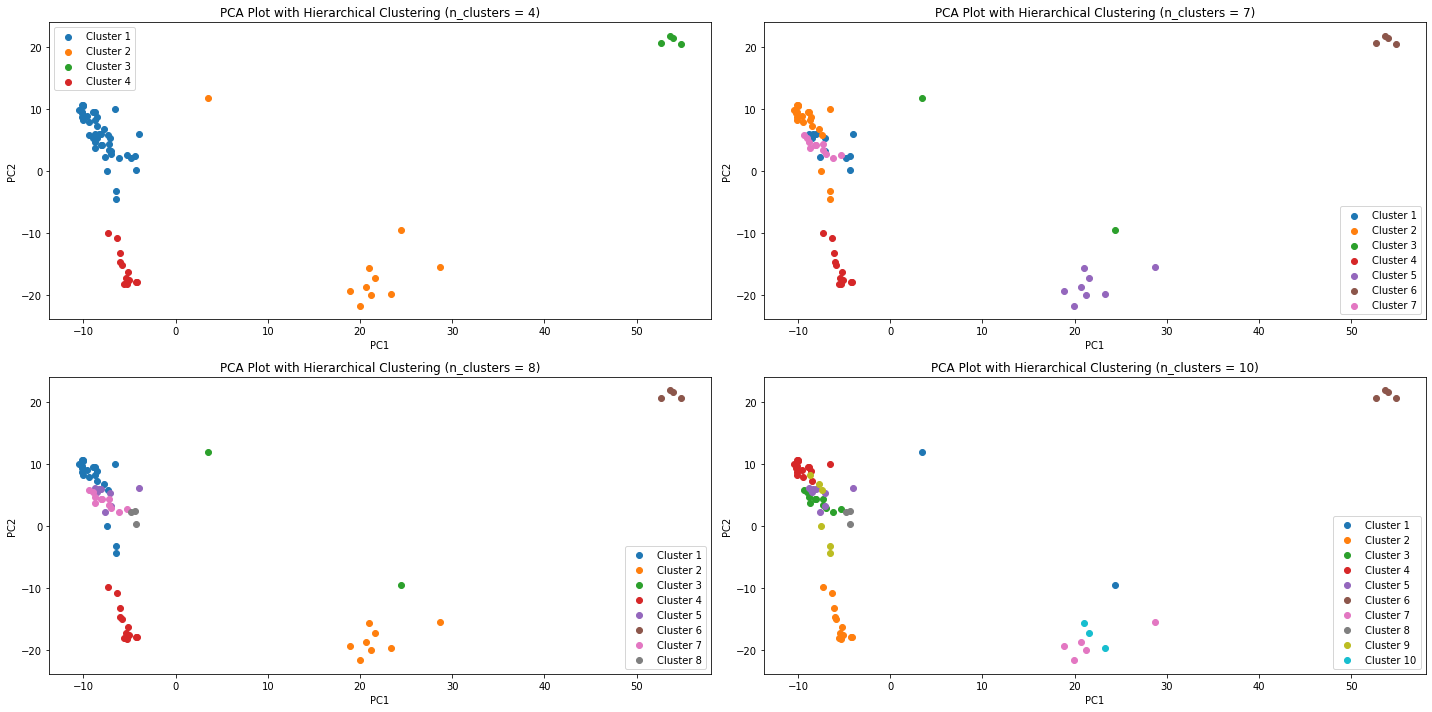

In [14]:
# Perform PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_normalized)

# Plot PCA with different numbers of clusters for hierarchical clustering (n_clusters = 2, 3, 4, 5)
plt.figure(figsize=(20, 10))
for i, n_clusters in enumerate([4, 7, 8, 10], 1):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(df_normalized)
    
    plt.subplot(2, 2, i)
    for cluster in range(n_clusters):
        plt.scatter(pca_data[cluster_labels == cluster, 0], pca_data[cluster_labels == cluster, 1], label=f'Cluster {cluster + 1}')
    plt.title(f'PCA Plot with Hierarchical Clustering (n_clusters = {n_clusters})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

plt.tight_layout()
plt.show()


From the PCA plot above, it is apparent that when the number of clusters is set to 4, 7, or 8, the separation is satisfactory.

When n_clusters is 4, there is no overlap between clusters. However, due to the small number of clusters, there is a possibility that subgroups within the clusters need further clustering.

For n_clusters = 7, some overlaps occur between cluster 1 and cluster 7, and clusters 2 and 3 appear to have subgroups that require further clustering, as they are spatially separated in the PCA plot.

With n_clusters = 8, there is less overlap, and the clusters seem to be well separated.

**In summary, after considering the three metrics used in this analysis (dendrograms, silhouette scores, and PCA plot), I have selected n_clusters = 8 as the optimal hyperparameter for the hierarchical clustering model.**

## 5.2. K-means Clustering

In [15]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_normalized.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

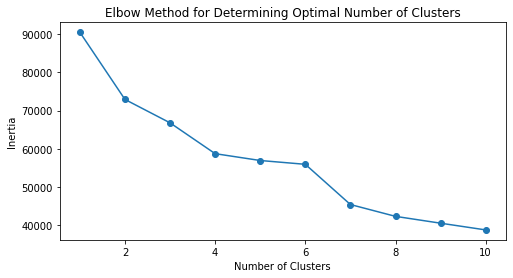

In [16]:
# Plot the inertia
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the inertia plot, there is no clear "elbow" present, suggesting that the original data may have many overlapped features that cannot be easily separated. However, a subtle "elbow" can be observed at n_clusters = 7. To further validate if n_clusters = 7 yields the best performance, I will assess the silhouette score for various values of n_clusters.

In [17]:
# Determine the optimal number of clusters using the silhouette score
silhouette_scores_kmeans = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized.iloc[:, :-1])
    silhouette_avg = silhouette_score(df_normalized.iloc[:, :-1], cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

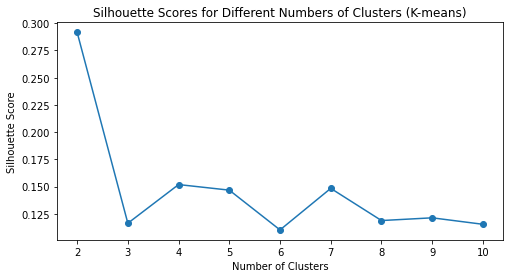

In [18]:
# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

From the silhouette score plot, it is evident that the performance is great when n_clusters = 7. This result is consistent with the findings from the "elbow" method.

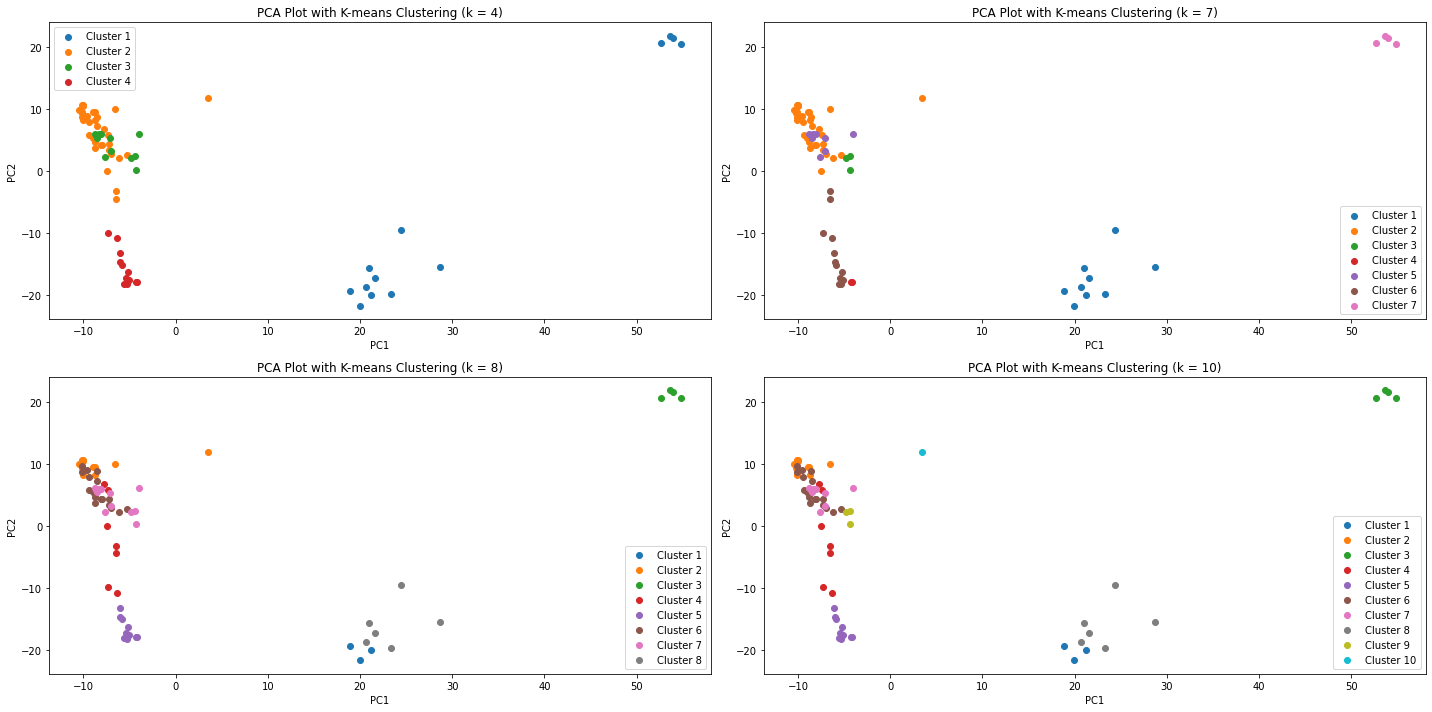

In [19]:
# Perform PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_normalized)

# Plot PCA with different numbers of clusters (k = 4, 7, 8, 10)
plt.figure(figsize=(20, 10))
for i, k in enumerate([4, 7, 8, 10], 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized)
    
    plt.subplot(2, 2, i)
    for cluster in range(k):
        plt.scatter(pca_data[cluster_labels == cluster, 0], pca_data[cluster_labels == cluster, 1], label=f'Cluster {cluster + 1}')
    plt.title(f'PCA Plot with K-means Clustering (k = {k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

plt.tight_layout()
plt.show()


From the PCA plot above, it is apparent that when n_clusters = 7, the model exhibits fewer overlaps between clusters. This finding further confirms that n_clusters = 7 is the optimal hyperparameter for K-means clustering.

**In summary, after evaluating the three metrics used in this analysis (elbow method, silhouette scores, and PCA plot), n_clusters = 7 has been selected as the optimal hyperparameter for the K-means clustering model.**

## 6. Results and Analysis

In this section, I will conduct a side-by-side comparison of the hierarchical clustering model and the K-means clustering model.

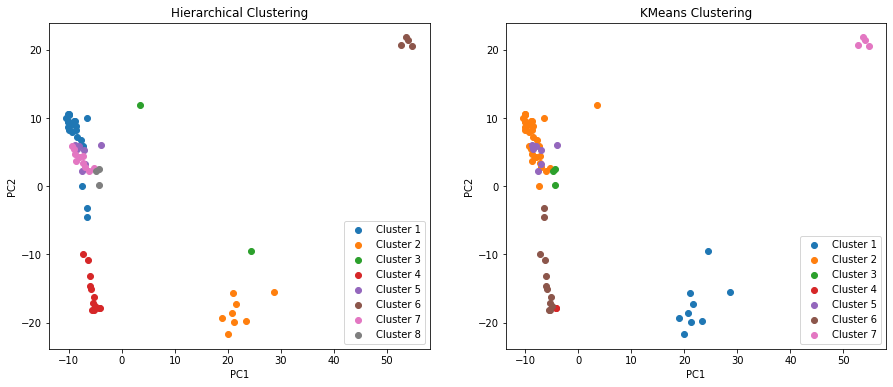

In [25]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Initialize the clustering models
kmeans = KMeans(n_clusters=7, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=8)

# Fit the models and get the cluster labels
kmeans_labels = kmeans.fit_predict(df_normalized)
hierarchical_labels = hierarchical.fit_predict(df_normalized)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hierarchical plot
for cluster in range(8):
    axes[0].scatter(principal_df['PC1'][hierarchical_labels == cluster], principal_df['PC2'][hierarchical_labels == cluster], label=f'Cluster {cluster + 1}')
axes[0].set_title('Hierarchical Clustering')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# KMeans plot
for cluster in range(7):
    axes[1].scatter(principal_df['PC1'][kmeans_labels == cluster], principal_df['PC2'][kmeans_labels == cluster], label=f'Cluster {cluster + 1}')
axes[1].set_title('KMeans Clustering')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()



plt.show()


In [20]:
# Compare the performance
print("Silhouette Score for Hierarchical Clustering(clusters = 8):", silhouette_scores[6])
print("Silhouette Score for K-means Clustering(clusters = 7):", silhouette_scores_kmeans[5])

Silhouette Score for Hierarchical Clustering(clusters = 8): 0.18370696495056735
Silhouette Score for K-means Clustering(clusters = 7): 0.14833485694801082


### Hierarchical Clustering:
**What I did:** I compared different linkage methods for clustering, including 'complete', 'single', 'average', 'centroid', and 'ward', and found that 'ward' had the best performance. I then compared three different metrics—dendrograms, silhouette scores, and PCA plot—and selected n_clusters = 8 as the optimal hyperparameter for the hierarchical clustering model.

**The results:** The final hierarchical model achieved a silhouette score of 0.1837, which is considered fair. This could be due to the dataset not being distinct enough and difficult to separate. The PCA plot shows relatively good separation, except for subsets of cluster 1 and cluster 3, which may need further clustering.

### K-means Clustering:
**What I did:** I compared three different metrics—elbow method, silhouette scores, and PCA plot—and selected n_clusters = 7 as the optimal hyperparameter for the K-means clustering model.

**The results:** The final K-means model achieved a silhouette score of 0.1483, which is lower than the hierarchical model. This indicates that hierarchical clustering outperformed K-means clustering on this dataset. The PCA plot shows some overlap between different clusters, such as cluster 2 and 5, and cluster 4 and 6. Compared to the PCA plot of hierarchical clustering, the K-means model did not perform well.

## 7. Discussion and Conclusion

**Key takeaways:**
1. Different linkage methods in hierarchical clustering can result in varying dendrograms.
2. Determining optimal hyperparameters (n_clusters) for both models can be challenging, as different metrics may suggest different optimal values, and the choice can sometimes be subjective.

**Caveats:**
In hindsight, the dataset may not have been ideal for comparing clustering algorithms due to several reasons:
1. The biological system is highly complex, and the presence of noise in the data can significantly affect clustering results.
2. The absence of domain knowledge in this project complicates the interpretation of results. For instance, some brain areas may share developmental similarities, making it difficult to separate them into distinct clusters.

**Ways to improve:**
1. Since the data is labeled, using the labels to test the accuracy of the models and using accuracy as a new metric for comparison could provide additional insights.
2. Preprocessing the data using domain knowledge before applying clustering, such as identifying normal gene expression levels and functions of brain areas, could help detect outliers or errors in the dataset and improve model performance significantly.